**Project Title :** Netflix Data:Cleaning,
 Analysis and Visualization

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# Configure visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [8]:
# Load the dataset
df = pd.read_csv('/content/netflix1.csv')

In [9]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [10]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1mG6pP4ZONp3FQhEhwEB4co87xh7mlR1kt1xtl0LAUf8#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [12]:
# Display the first few rows to understand the data structure
print("Initial Data Preview:")
print(netflix_data.head())

Initial Data Preview:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2

Data Cleaning
1. Identify and handle missing data: Check for missing values and drop if necessary.
2. Correct data types: Convert date columns to datetime and extract values from text-based columns.
3. Drop duplicates: Ensure each entry is unique.

In [13]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(netflix_data.isnull().sum())


Missing Values in Each Column:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [14]:
 # Drop duplicates if any
 netflix_data.drop_duplicates(inplace=True)

In [15]:
# Convert 'date_added' to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

In [16]:
# Extract duration numeric values and label them by type (minutes for Movies, seasons for TV Shows)
netflix_data['duration_value'] = netflix_data['duration'].str.extract('(\d+)').astype(float)
netflix_data['duration_type'] = netflix_data['duration'].apply(lambda x: 'seasons' if 'Season' in x else 'minutes')


In [17]:
# Display the cleaned data types
print("\nData Types After Cleaning:")
print(netflix_data.dtypes)


Data Types After Cleaning:
show_id                   object
type                      object
title                     object
director                  object
country                   object
date_added        datetime64[ns]
release_year               int64
rating                    object
duration                  object
listed_in                 object
duration_value           float64
duration_type             object
dtype: object


Exploratory Data Analysis (EDA)**bold text**

1 Distribution of Content Types (Movies vs. TV Shows)

<ipython-input-18-2c5c637535dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_data, x='type', palette='Set2')


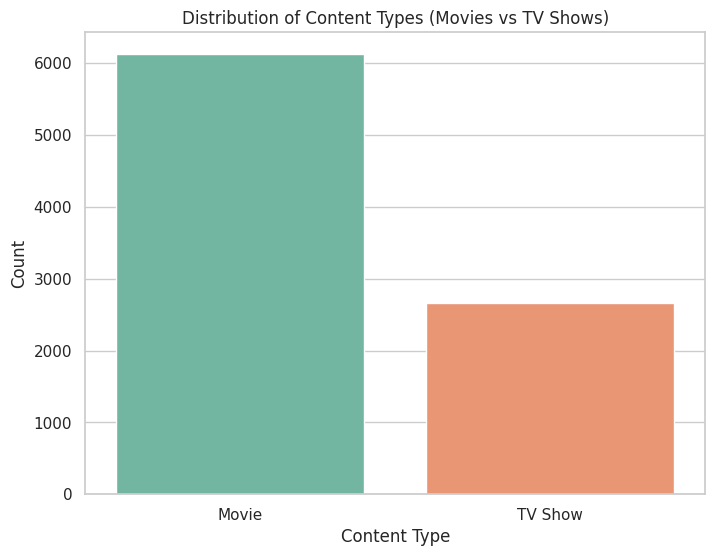

In [18]:
# Content type distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=netflix_data, x='type', palette='Set2')
plt.title("Distribution of Content Types (Movies vs TV Shows)")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

2 Content Addition Trend Over Time

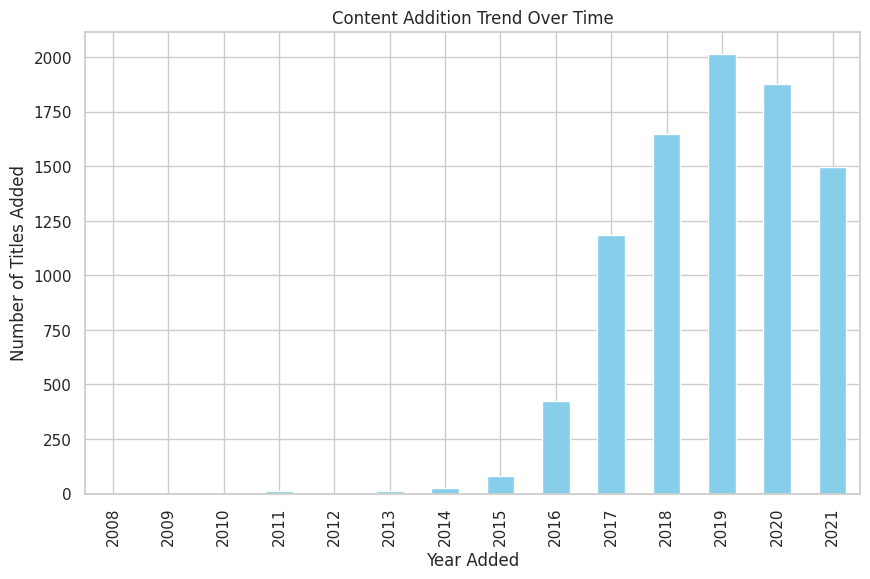

In [19]:
# Extract year from 'date_added' and plot trend
netflix_data['year_added'] = netflix_data['date_added'].dt.year
content_addition_trend = netflix_data['year_added'].value_counts().sort_index()

# Plot content addition trend over time
plt.figure(figsize=(10, 6))
content_addition_trend.plot(kind='bar', color='skyblue')
plt.title("Content Addition Trend Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.show()

3 Popular Genres (Word Cloud)

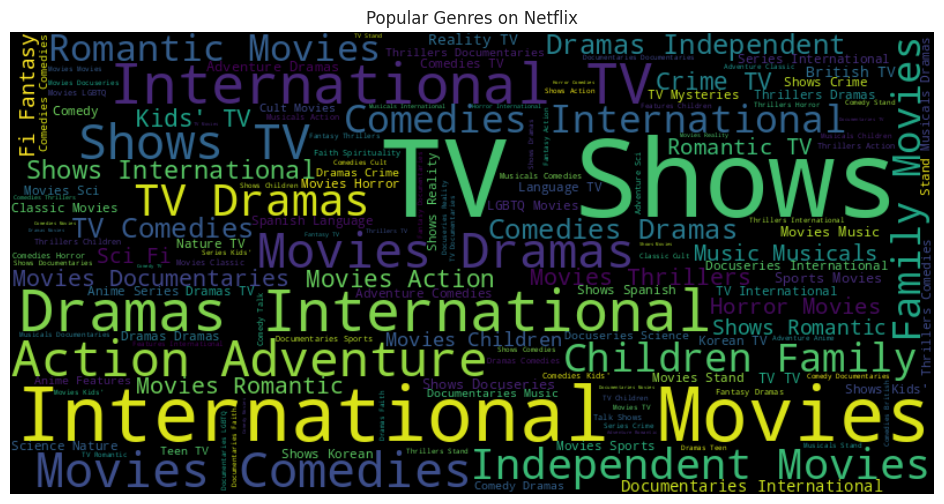

In [20]:
# Generate word cloud for genres
genres_text = " ".join(netflix_data['listed_in'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(genres_text)

# Plot word cloud for popular genres
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular Genres on Netflix")
plt.show()

4 Top Countries by Content Count

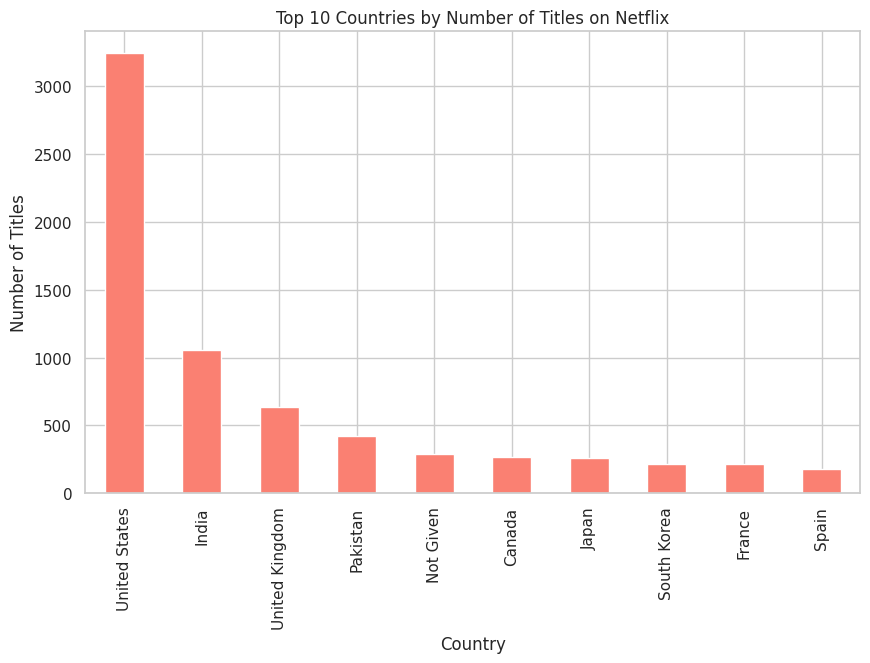

In [21]:
# Top 10 countries by content count
top_countries = netflix_data['country'].value_counts().head(10)

# Plot top countries by number of titles
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='salmon')
plt.title("Top 10 Countries by Number of Titles on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

5 Top 10 Directors

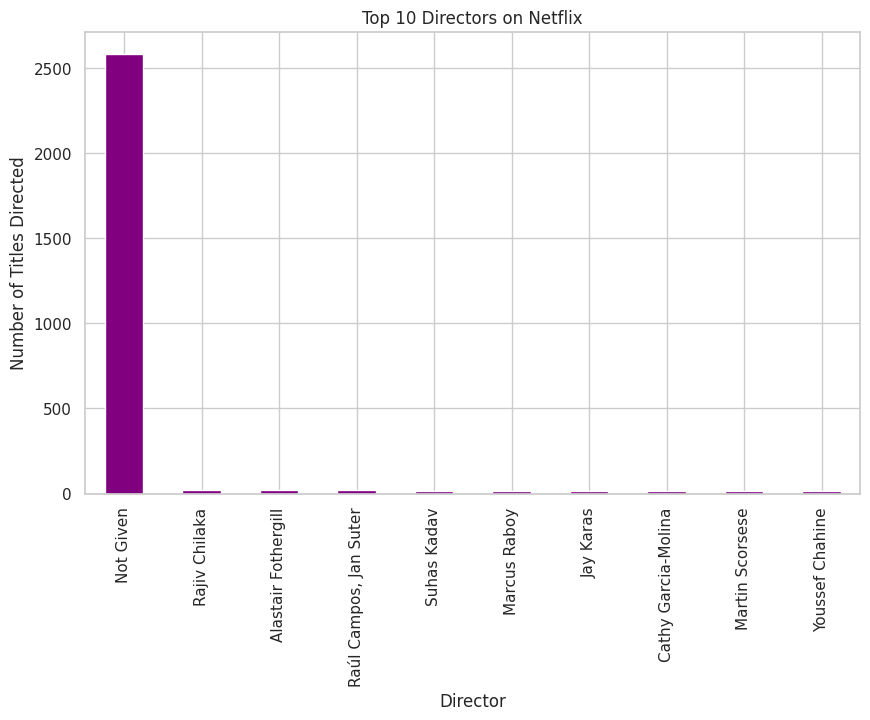

In [22]:
# Get top 10 directors by content count
top_directors = netflix_data['director'].value_counts().dropna().head(10)

# Plot top directors
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='purple')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Director")
plt.ylabel("Number of Titles Directed")
plt.show()

**5: Conclusion and Insights**

1. Cleaned the data: Handled missing values, removed duplicates, and standardized data types for analysis.

2. Explored data with visualizations:
* Content Type Distribution: Revealed the ratio of movies to TV shows.
* Trend of Content Addition: Showed how Netflix's library expanded over the years.
* Popular Genres: Displayed in a word cloud for easy visual recognition.
* Top Countries and Directors: Provided insights into countries and directors contributing the most content.

3. Further Analysis:
* Content trends suggest a focus on specific genres, countries, and prolific directors.
* This cleaned and analyzed data can be used for deeper insights, such as recommendations or genre prediction based on trends.